<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/MACHINE%20LEARNING%20Y%20DEEP%20LEARNING/ProyectoMLP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Primer Proyecto de MLPs**

- El objetivo de este ejercicio es revisar todos los conceptos vistos en clase hasta ahora, para construir una arquitectura de red neuronal completamente conectada (MLP), que tenga el mejor desempeño posible sobre una tarea dada.

- La idea es que a través de la experimentación, lleguemos a construir un modelo robusto, que sirva como base para resolver otras tareas similares.

- El problema a resolver es de clasificación de imágenes usando CIFAR10.

##**Conjunto de Datos**

El conjunto de datos CIFAR10 tiene imágenes de 32x32 píxeles. Hay 50.000 imágenes de entrenamiento y 10.000 imágenes de pruebas. Cada imagen en CIFAR10 tiene asignada una de las diez clases disponibles.


In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import numpy as np





Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
#from tensorflow.keras.layers import Input, Dense, concatenate
#from tensorflow.keras.models import Model

##**Etapas mínimas a realizar**

Las etapas se encuentran enumeradas














1. Separar los conjuntos de entrenamiento, validación y prueba correspondientes.

In [4]:
(X_train_full, y_train_full), (X_test, y_test)=tf.keras.datasets.cifar10.load_data()
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
# conservamos la separacion entre entrenamiento X_train_full (50000) y prueba X_test (10000)
#separamos aleatoriamente X_train (37500) y X_valid (12500)

170498071/170498071 [==============================] - 2s 0us/step


In [5]:
assert X_train_full.shape == (50000, 32, 32, 3)
assert y_train_full.shape == (50000, 1)
assert y_test.shape == (10000, 1)

assert X_train.shape == (37500, 32, 32, 3)
assert X_valid.shape == (12500, 32, 32, 3)

In [6]:
clases_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

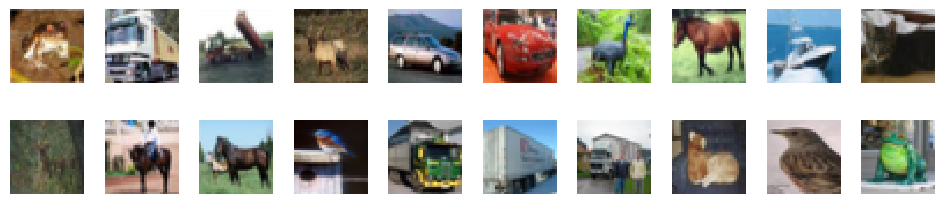

In [7]:
#Imprimimos los primeros 10 objetos
n_rows = 2
n_cols = 10

plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

for row in range(n_rows):
    for col in range(n_cols):#
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)

        plt.imshow(X_train_full[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        #plt.title(clases_names[y_train_full[index]], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

2. Aplicar escala y normalización, si lo cree conveniente.

In [8]:
#Reducimos las intensidades de los píxeles al rango 0-1 dividiéndolas por 255.
#con ello normalizamos los datos y evitamos inestabilidad numérica
X_train=X_train/255
X_valid=X_valid/255
X_test=X_test/255

3. Usar el enfoque funcional (functional API) para definir la arquitectura de la red neuronal MLP.

In [21]:
np.random.seed(42)
tf.random.set_seed(42)

In [26]:
input_ = keras.layers.Flatten(input_shape=[32, 32,3])

In [27]:
#input_ = keras.layers.Input(shape=(32,32,3))
input_ = keras.layers.Input(Flatten(input_shape=[32, 32,3]))
hidden1 = keras.layers.Dense(50, activation="relu"){input_}
hidden2 = keras.layers.Dense(50, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(50, activation="relu")(hidden2)
hidden4 = keras.layers.Dense(50, activation="relu")(hidden3)
hidden5 = keras.layers.Dense(50, activation="relu")(hidden4)

concat = keras.layers.concatenate([input_, hidden5])

output = keras.layers.Dense(10,activation="softmax")(concat)

model = keras.models.Model(inputs=[input_], outputs=[output])

SyntaxError: invalid syntax (<ipython-input-27-684f609a28f6>, line 3)

In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model

In [66]:
input_ = Input(shape=(32, 32, 3))
flattened = Flatten()(input_)

hidden1 = keras.layers.Dense(500, activation='relu')(flattened)
hidden2 = keras.layers.Dense(400, activation='relu')(hidden1)
hidden3 = keras.layers.Dense(300, activation='relu')(hidden2)
hidden4 = keras.layers.Dense(200, activation='relu')(hidden3)
hidden5 = keras.layers.Dense(100, activation='relu')(hidden4)

concat = keras.layers.concatenate([flattened, hidden5])

output = keras.layers.Dense(10, activation='softmax')(concat)

model = Model(inputs=[input_], outputs=[output])

In [67]:
model.layers

In [68]:
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_18 (InputLayer)       [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 flatten_13 (Flatten)        (None, 3072)                 0         ['input_18[0][0]']            
                                                                                                  
 dense_73 (Dense)            (None, 500)                  1536500   ['flatten_13[0][0]']          
                                                                                                  
 dense_74 (Dense)            (None, 400)                  200400    ['dense_73[0][0]']            
                                                                                           

4. La arquitectura debe ser profunda, con por lo menos 5 capas densas. Definir un número de neuronas para cada capa oculta, función de costo y justificar esas elecciones.

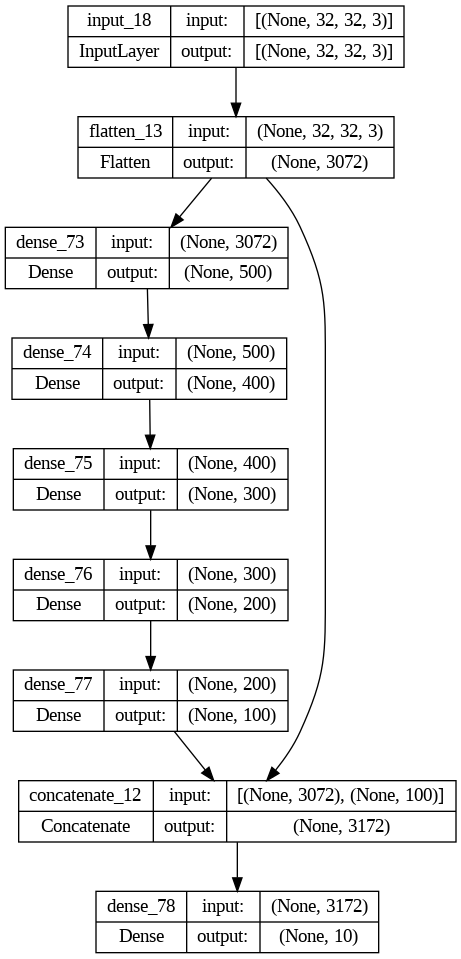

In [69]:
keras.utils.plot_model(model, "my_cifar10_model.png", show_shapes=True)

In [78]:
#compilamos el modelo
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

#optimizer=keras.optimizers.SGD(learning_rate=1e-3)
#optimizer='adam'

 Para la arquitectura de nuestro modelo inicimos con 300 neuronas en todas las capas y utilizamos como funcion de costo (sparse_categorical_crossentropy) porque se tiene etiquetas con las clases(indices de 0 a 9) y la metrica que usaremos para entrenamiento y validación será ``accuracy``

5. Usar Callbacks: ModelCheckpoint y EarlyStopping al momento de entrenar.

In [86]:
#usamos el callbacks para guardar checkpoints e interrumpir cuando no hay progreso
checkpoint_cb = keras.callbacks.ModelCheckpoint("mi_modelo_keras.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

In [80]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb,early_stopping_cb])

model = keras.models.load_model("mi_modelo_keras.h5")


Epoch 1/100
1172/1172 [==============================] - 43s 35ms/step - loss: 1.8216 - accuracy: 0.3755 - val_loss: 1.8251 - val_accuracy: 0.3723
Epoch 2/100
1172/1172 [==============================] - 38s 32ms/step - loss: 1.7664 - accuracy: 0.3891 - val_loss: 1.8189 - val_accuracy: 0.3632
Epoch 3/100
1172/1172 [==============================] - 40s 34ms/step - loss: 1.7379 - accuracy: 0.4006 - val_loss: 1.8534 - val_accuracy: 0.3678
Epoch 4/100
1172/1172 [==============================] - 37s 32ms/step - loss: 1.6971 - accuracy: 0.4150 - val_loss: 1.7763 - val_accuracy: 0.3845
Epoch 5/100
1172/1172 [==============================] - 38s 32ms/step - loss: 1.6651 - accuracy: 0.4221 - val_loss: 1.7119 - val_accuracy: 0.4028
Epoch 6/100
1172/1172 [==============================] - 37s 32ms/step - loss: 1.6430 - accuracy: 0.4335 - val_loss: 1.6569 - val_accuracy: 0.4202
Epoch 7/100
1172/1172 [==============================] - 36s 31ms/step - loss: 1.6187 - accuracy: 0.4406 - val_loss: 1

In [81]:
mse_test = model.evaluate(X_test, y_test)
mse_test

313/313 [==============================] - 2s 7ms/step - loss: 1.6211 - accuracy: 0.4291


[1.621092677116394, 0.42910000681877136]

6. Mostrar el gráfico de la función de costo en tiempo de entrenamiento vs tiempo de validación, para verificar si hay overfitting.

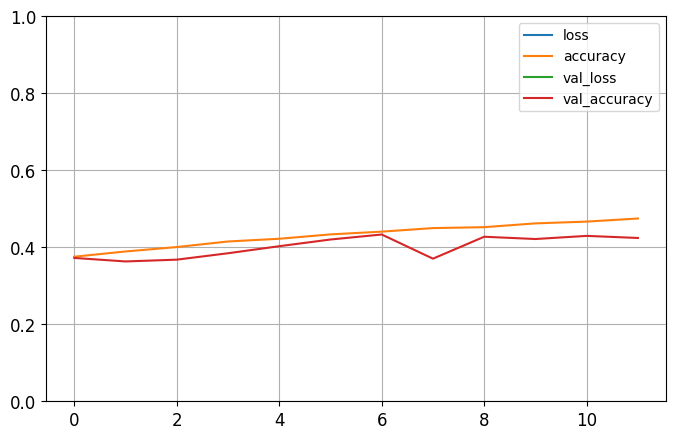

In [82]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

6. Definir una función de activación y también un mecanismo de inicialización de pesos. Justificar esta elección.

In [95]:
from tensorflow.keras.initializers import HeNormal
initializer = HeNormal()

In [96]:
input_ = Input(shape=(32, 32, 3))
flattened = Flatten()(input_)

hidden1 = keras.layers.Dense(500, activation='relu',kernel_initializer="he_normal")(flattened)
hidden2 = keras.layers.Dense(400, activation='relu',kernel_initializer="he_normal")(hidden1)
hidden3 = keras.layers.Dense(300, activation='relu',kernel_initializer="he_normal")(hidden2)
hidden4 = keras.layers.Dense(200, activation='relu',kernel_initializer="he_normal")(hidden3)
hidden5 = keras.layers.Dense(100, activation='relu',kernel_initializer="he_normal")(hidden4)

concat = keras.layers.concatenate([flattened, hidden5])

output = keras.layers.Dense(10, activation='softmax',kernel_initializer="he_normal")(concat)

model = Model(inputs=[input_], outputs=[output])


In [98]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [99]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("mi_modelo_keras.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

In [100]:
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb,early_stopping_cb])

model = keras.models.load_model("mi_modelo1_keras.h5")

Epoch 1/100
1172/1172 [==============================] - 39s 32ms/step - loss: 1.9768 - accuracy: 0.3081 - val_loss: 1.8649 - val_accuracy: 0.3536
Epoch 2/100
   1/1172 [..............................] - ETA: 40s - loss: 1.7761 - accuracy: 0.2812

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1172/1172 [==============================] - 38s 32ms/step - loss: 1.8854 - accuracy: 0.3445 - val_loss: 1.8687 - val_accuracy: 0.3511
Epoch 3/100
1172/1172 [==============================] - 37s 32ms/step - loss: 1.8555 - accuracy: 0.3614 - val_loss: 1.9752 - val_accuracy: 0.3274
Epoch 4/100
1172/1172 [==============================] - 38s 33ms/step - loss: 1.8363 - accuracy: 0.3711 - val_loss: 1.8963 - val_accuracy: 0.3522
Epoch 5/100
1172/1172 [==============================] - 40s 34ms/step - loss: 1.8308 - accuracy: 0.3743 - val_loss: 1.8437 - val_accuracy: 0.3594
Epoch 6/100
1172/1172 [==============================] - 40s 34ms/step - loss: 1.8235 - accuracy: 0.3795 - val_loss: 1.8025 - val_accuracy: 0.3782
Epoch 7/100
1172/1172 [==============================] - 37s 32ms/step - loss: 1.8253 - accuracy: 0.3811 - val_loss: 1.8109 - val_accuracy: 0.3774
Epoch 8/100
1172/1172 [==============================] - 39s 33ms/step - loss: 1.8081 - accuracy: 0.3848 - val_loss: 1.9420 - val_

OSError: No file or directory found at mi_modelo1_keras.h5

7. Usar el mecanismo de Batch Normalization. Justificar la elección de sus hiperparámetros.

In [ ]:
#La técnica consiste en agregar una operación en el modelo justo antes o después de la función de activación de cada capa oculta.

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)


In [ ]:
input_ = Input(shape=(32, 32, 3))
flattened = Flatten()(input_)

hidden1 = keras.layers.Dense(500, activation='relu',kernel_initializer="he_normal")(flattened)
bn1 = keras.layers.BatchNormalization()(hidden1)
hidden2 = keras.layers.Dense(400, activation='relu',kernel_initializer="he_normal")(bn1)
bn2 = keras.layers.BatchNormalization()(hidden2)
hidden3 = keras.layers.Dense(300, activation='relu',kernel_initializer="he_normal")(bn2)
bn3 = keras.layers.BatchNormalization()(hidden3)
hidden4 = keras.layers.Dense(200, activation='relu',kernel_initializer="he_normal")(bn3)
bn4 = keras.layers.BatchNormalization()(hidden4)
hidden5 = keras.layers.Dense(100, activation='relu',kernel_initializer="he_normal")(bn4)
bn5 = keras.layers.BatchNormalization()(hidden5)
concat = keras.layers.concatenate([flattened, hidden5])

output = keras.layers.Dense(10, activation='softmax',kernel_initializer="he_normal")(concat)

model = Model(inputs=[input_], outputs=[output])

8. Usar un mecanismo de regularización (puede ser Dropout).

9. Definir una función de optimización y justificar su elección.

10. Encontrar una taza de aprendizaje adecuada usando alguna estrategia de *Learning Rate Scheduling*. Justificar la elección de sus hiperparámetros.

11. Realizar un proceso de ajuste de hiperparámetros (los que considere convenientes), usando Keras Tuner.

12. Reporte el resultado final en el conjunto de prueba usando la(s) métrica(s) de clasificación seleccionada(s).

13. Definir una segunda arquitectura reutilizando todas las capas y sus pesos (a excepción de la capa de salida) haciendo una conexión *wide and deep*, de las entradas. Mejora el resultado?

##**Recomendaciones**

- Se pueden intentar otras optimizaciones adicionales, arquitecturas y afinamientos. El objetivo es intentar mejorar cada vez más la métrica del problema en cuestión.

- En la medida de lo posible, justifique las elecciones de arquitectura, hiperparámetros, etc.

- Es posible, que una arquitectura más simple resuelva mejor el problema, indicar esto después de haber probado la configuración básica propuesta.

In [ ]:
import numpy as np

# Crear una matriz de ejemplo
matriz_ejemplo = np.random.randint(0, 256, size=(1, 32, 32, 3))

# Mostrar la matriz de ejemplo
print(matriz_ejemplo)

[[[[ 67  60 124]
   [ 52 133  69]
   [ 76  99 191]
   ...
   [ 97 148  70]
   [132  12  42]
   [221 227 122]]

  [[ 18 181  41]
   [ 11 231 189]
   [  4 232 171]
   ...
   [ 57 222 244]
   [137 123 188]
   [239 231 176]]

  [[139 191 174]
   [245 152 138]
   [ 13  34 139]
   ...
   [203 130 232]
   [ 82 208 137]
   [243 252 200]]

  ...

  [[109 231  75]
   [115 195 241]
   [ 40  16  73]
   ...
   [126  60 200]
   [171  67  16]
   [100  71  57]]

  [[108 228 165]
   [239 183  88]
   [135 153  93]
   ...
   [249 181 160]
   [207 228 215]
   [155 169 234]]

  [[244 162 244]
   [167 216 175]
   [214  51  80]
   ...
   [ 48 237  33]
   [ 44 223  22]
   [185 148  33]]]]


In [ ]:
len(matriz_ejemplo)

1

In [ ]:
len(matriz_ejemplo[0])

32

In [ ]:
len(matriz_ejemplo[0][0])

32

In [ ]:
len(matriz_ejemplo[0][0][0])

3

In [ ]:
print(matriz_ejemplo[0][0])

[[ 67  60 124]
 [ 52 133  69]
 [ 76  99 191]
 [ 54 143 194]
 [ 80 135 170]
 [131 199 204]
 [ 81 153 198]
 [208 251 230]
 [186 103 203]
 [ 37 177 160]
 [ 63 241 133]
 [250 109  92]
 [ 80 141  60]
 [ 99  82 149]
 [ 89  81  54]
 [228 192 237]
 [ 84  41  67]
 [199  24   3]
 [121  62 188]
 [119  83 121]
 [ 56 179 243]
 [140  32  67]
 [ 27   6  39]
 [105 190 237]
 [ 39  62  48]
 [ 77 234 210]
 [ 92 163 117]
 [ 38 236  74]
 [248  39 185]
 [ 97 148  70]
 [132  12  42]
 [221 227 122]]
